### Data Dictionary

In this part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and
you want to determine each applicant's chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant's scores on two exams and the admissions
decision.

Your task is to build a classication model that estimates an applicant's
probability of admission based the scores from those two exams.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


from sklearn.linear_model import LogisticRegression

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)


from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer

#from tpot import TPOTClassifier, TPOTRegressor
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)

#from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("admission.csv")

In [3]:
df

,exam1,exam2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   exam1      100 non-null    float64
 1   exam2      100 non-null    float64
 2   admission  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
df.describe(include='all')

,exam1,exam2,admission
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [6]:
df.shape

(100, 3)

In [7]:
df.columns

Index(['exam1', 'exam2', 'admission'], dtype='object')

### Data Visualization

### Bivariate Data Exploration

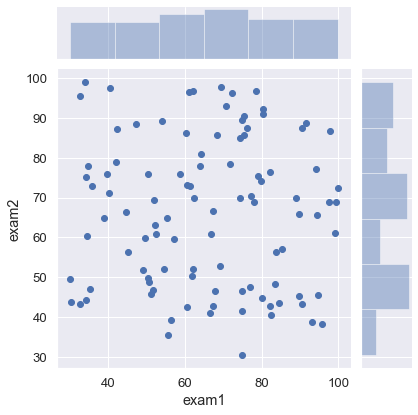

In [8]:
sns.jointplot(x='exam1', y='exam2',data=df, kind='scatter')
plt.show()

### Train Test Split

In [9]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [10]:
X.values, y.values

(array([[34.62365962, 78.02469282],
        [30.28671077, 43.89499752],
        [35.84740877, 72.90219803],
        [60.18259939, 86.3085521 ],
        [79.03273605, 75.34437644],
        [45.08327748, 56.31637178],
        [61.10666454, 96.51142588],
        [75.02474557, 46.55401354],
        [76.0987867 , 87.42056972],
        [84.43281996, 43.53339331],
        [95.86155507, 38.22527806],
        [75.01365839, 30.60326323],
        [82.30705337, 76.4819633 ],
        [69.36458876, 97.71869196],
        [39.53833914, 76.03681085],
        [53.97105215, 89.20735014],
        [69.07014406, 52.74046973],
        [67.94685548, 46.67857411],
        [70.66150955, 92.92713789],
        [76.97878373, 47.57596365],
        [67.37202755, 42.83843832],
        [89.67677575, 65.79936593],
        [50.53478829, 48.85581153],
        [34.21206098, 44.2095286 ],
        [77.92409145, 68.97235999],
        [62.27101367, 69.95445795],
        [80.19018075, 44.82162893],
        [93.1143888 , 38.800

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

### Feature Scaling

In [13]:
X_train

,exam1,exam2
43,82.368754,40.618255
62,56.253818,39.261473
3,60.182599,86.308552
71,64.039320,78.031688
45,62.222676,52.060992
...,...,...
96,42.261701,87.103851
67,49.072563,51.883212
64,44.668262,66.450086
47,97.771599,86.727822


### Model Training

In [14]:
lr = LogisticRegression()

In [15]:
lr.fit(X_train,y_train)

LogisticRegression()

In [16]:
ypred = lr.predict_proba(X_test)

In [17]:
ypred

array([[5.63705293e-01, 4.36294707e-01],
       [6.80180160e-01, 3.19819840e-01],
       [9.60959084e-01, 3.90409161e-02],
       [9.60617739e-01, 3.93822614e-02],
       [9.34410266e-05, 9.99906559e-01],
       [1.04787944e-03, 9.98952121e-01],
       [6.93128150e-01, 3.06871850e-01],
       [1.57148103e-01, 8.42851897e-01],
       [9.94033360e-01, 5.96664047e-03],
       [2.45004744e-01, 7.54995256e-01],
       [9.97618264e-01, 2.38173592e-03],
       [9.99109309e-01, 8.90690876e-04],
       [9.90204626e-01, 9.79537390e-03],
       [2.03364990e-04, 9.99796635e-01],
       [7.14267548e-01, 2.85732452e-01],
       [1.41627264e-01, 8.58372736e-01],
       [9.94841744e-01, 5.15825616e-03],
       [1.38109603e-02, 9.86189040e-01],
       [6.74730422e-01, 3.25269578e-01],
       [4.49883845e-04, 9.99550116e-01]])

In [18]:
test = pd.DataFrame([[45,85]], columns=['exam1','exam2'])

In [19]:
test

,exam1,exam2
0,45,85


In [20]:
lr.predict_proba(test)

array([[0.25203888, 0.74796112]])

After you have completed the code in predict.m, the ex2.m script will
proceed to report the training accuracy of your classier by computing the
percentage of examples it got correct.

### Load test data

In [21]:
testdata = pd.read_csv("test.csv")

In [22]:
testdata

,exam1,exam2
0,0.051267,0.699560
1,-0.092742,0.684940
2,-0.213710,0.692250
3,-0.375000,0.502190
4,-0.513250,0.465640
...,...,...
113,-0.720620,0.538740
114,-0.593890,0.494880
115,-0.484450,0.999270
116,-0.006336,0.999270


In [25]:
lr.predict_proba(testdata)

array([[1.00000000e+00, 1.24641279e-11],
       [1.00000000e+00, 1.20794464e-11],
       [1.00000000e+00, 1.18130381e-11],
       [1.00000000e+00, 1.10049550e-11],
       [1.00000000e+00, 1.06293185e-11],
       [1.00000000e+00, 1.00612716e-11],
       [1.00000000e+00, 9.94952592e-12],
       [1.00000000e+00, 9.66994623e-12],
       [1.00000000e+00, 9.86384145e-12],
       [1.00000000e+00, 9.86487115e-12],
       [1.00000000e+00, 1.02607762e-11],
       [1.00000000e+00, 1.06514505e-11],
       [1.00000000e+00, 1.15236843e-11],
       [1.00000000e+00, 1.18901777e-11],
       [1.00000000e+00, 1.31538648e-11],
       [1.00000000e+00, 1.28335383e-11],
       [1.00000000e+00, 1.23348335e-11],
       [1.00000000e+00, 1.25241065e-11],
       [1.00000000e+00, 1.19250730e-11],
       [1.00000000e+00, 1.10786612e-11],
       [1.00000000e+00, 1.07248165e-11],
       [1.00000000e+00, 1.01134095e-11],
       [1.00000000e+00, 9.51590310e-12],
       [1.00000000e+00, 9.29802817e-12],
       [1.000000